# Logistic Regression
## Introduction
This notebook is intended to step through the logistic regression algorithm development. The base version is python form of octave material from Andrew Ng.

## Data description and objective
The problem is related to University admission. Given test results of two tests, we want to predict the probability of admission call from the university. We have prior results to help us with the prediction.
There are two features - results from two test scores and the target value is whether the student was admitted.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('ex2data1.txt',header=None)
X_orig = df.values[:,:2]
y_orig = df.values[:,2]
m = len(y_orig)
X = np.c_[np.ones(m),X_orig] #Add X0 feature vector for ease of vector calc.
print("Sample Features\n",X_orig[:5,:])
print("Sample Target\n",y_orig[:5])
print("Number of samples\n",m)

Sample Features
 [[ 34.62365962  78.02469282]
 [ 30.28671077  43.89499752]
 [ 35.84740877  72.90219803]
 [ 60.18259939  86.3085521 ]
 [ 79.03273605  75.34437644]]
Sample Target
 [ 0.  0.  0.  1.  1.]
Number of samples
 100


Let us plot to data to see the way it is distributed.

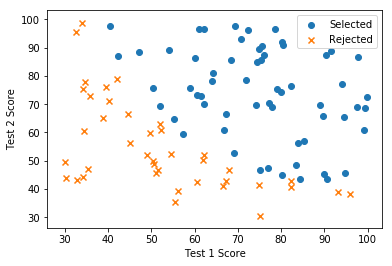

In [53]:
def draw_data():
    selected_index = (y_orig==1)
    rejected_index = (y_orig!=1)
    plt.scatter(X_orig[selected_index,0],X_orig[selected_index,1],marker='o',label='Selected')
    plt.scatter(X_orig[rejected_index,0],X_orig[rejected_index,1],marker='x',label='Rejected')
    plt.legend()
    plt.xlabel("Test 1 Score")
    plt.ylabel("Test 2 Score")
draw_data()
plt.show()

## Cost function and gradient
Let us write a logistic cost function and a gradient for that function.

In [76]:
def sigmoid(X):
    return(1/(1+np.exp(0-X)))

def cost_and_gradient(X,y,theta):
    m = len(y)
    n = len(theta)
    J = 0
    grad = np.zeros(n)
    z = np.dot(X,theta)
    hyp = sigmoid(z)
    
    t1 = -(np.dot(y,np.log(hyp)))
    t2 = -(np.dot((1-y),np.log(1-hyp)))
    J = (t1+t2)/m
    grad = (np.dot((hyp-y).T,X)/m)
    return J,grad

test_theta=np.array([-24,0.2,0.2])
cost,grad = cost_and_gradient(X,y_orig,test_theta)
print(cost,grad) # Should be around .218 and [.043,2.56,2.64]

0.218330193827 [ 0.04290299  2.56623412  2.64679737]


/Users/venkatesh/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


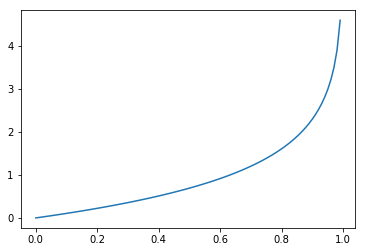

In [87]:
px = np.linspace(0,1,100)
py = -np.log(1-px)
plt.plot(px,py)
plt.show()

In [74]:
cost

0.21833019382659785

In [75]:
grad

array([ 0.04290299,  2.56623412,  2.64679737])